<a href="https://colab.research.google.com/github/faridjn/Springboard/blob/master/Unit%2027%20-%20Interview%20Challanges/1.%20ultimate_challenge/notebooks/Ultimate%20Challenge%20-%20Part%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Interview Challenge

## Part 3 ‐ Predictive modeling

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.


Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file `ultimate_data_challenge.json`. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).


### Data description

- `city`: city this user signed up in
- `phone`: primary device for this user
- `signup_date`: date of account registration; in the form ‘YYYYMMDD’
- `last_trip_date`: the last time this user completed a trip; in the form ‘YYYYMMDD’
- `avg_dist`: the average distance in miles per trip taken in the first 30 days after signup
- `avg_rating_by_driver`: the rider’s average rating over all of their trips
- `avg_rating_of_driver`: the rider’s average rating of their drivers over all of their trips
- `surge_pct`: the percent of trips taken with surge multiplier > 1
- `avg_surge`: The average surge multiplier over all of this user’s trips
- `trips_in_first_30_days`: the number of trips this user took in the first 30 days after signing up
- `ultimate_black_user`: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- `weekday_pct`: the percent of the user’s trips occurring during a weekday

## 1. Problem Definition

The problem statement is to help Ultimate Technologies Inc., a transportation network company, predict rider retention by analyzing a provided dataset of users who signed up for an Ultimate account in January 2014. The objective is to identify the factors that are the best predictors for rider retention and provide suggestions for operationalizing those insights to help Ultimate. The challenge requires performing data cleaning, exploratory analysis, and building a predictive model to determine if a user will be active in their 6th month on the system. The solution should include a discussion of the chosen approach, alternatives considered, and key indicators of model performance. Finally, the challenge requires a brief discussion on how Ultimate can leverage the insights gained from the model to improve its long-term rider retention.

## 2. Data Collection

### Installations 

In [ ]:
#!pip install ppscore
#!pip install pycaret==2.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 

### Import Libraries

In [17]:
#Fundamental libraries
import numpy as np 
import pandas as pd 

#Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Missing data vizualization libraries
import missingno as msno
import ppscore as pps

# read data
import os 

### Read Data

In [30]:
# Data source: URL: `True`, Local `False`
is_data_on_cloud = True

if is_data_on_cloud:


  import pandas as pd
  import urllib.request
  import json

  url = "https://raw.githubusercontent.com/faridjn/Springboard/master/Unit%2027%20-%20Interview%20Challanges/1.%20ultimate_challenge/data/ultimate_data_challenge.json"


  response = urllib.request.urlopen(url)
  data = response.read().decode()
  json_data = json.loads(data)


else:
  # Change directory one step back and save as the root directory
  root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
  print(root_dir)

  # Define the location of data directory
  path = root_dir + '\\data\\'

  # Set the file name
  json_data = path + 'ultimate_data_challenge.json'

In [31]:
#Read JSON file into a dataframe: df
df = pd.DataFrame(json_data)

## 3. Data Wrangling

### Utility functions

In [32]:
def describe_dataframe(df):
    print('Describe non-numeric columns:')
    display(df.describe(include = ['O', 'bool']).round(2).T)
    
    print('\nDescribe numeric columns:')
    display(df.describe().round(2).T)
    
    return None

In [33]:
#Missing data helper function
def count_missing(df):
    ''' Count the number of missing values .isnull() in each column well as the percentages 
    Call pd.concat() to form a single table df with 'count' and '%' columns'''
    
    print('\nMissing data stasts')
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing = missing.loc[missing['count'] > 0]
    missing.sort_values(by='count', inplace = True, ascending = False)
    
    return missing

### Data inspection and exploration

In [34]:
#Check size of the dataframe
print(df.shape)

(50000, 12)


In [35]:
#Display top 10 rows of the df
display(df.head(10).T)

,0,1,2,3,4,5,6,7,8,9
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell,Winterfell,Astapor,Winterfell,Winterfell,Winterfell
trips_in_first_30_days,4,0,3,9,14,2,1,2,2,1
signup_date,2014-01-25,2014-01-29,2014-01-06,2014-01-10,2014-01-27,2014-01-09,2014-01-24,2014-01-28,2014-01-21,2014-01-03
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4,3.5,NaN,5.0,4.5,NaN
avg_surge,1.1,1.0,1.0,1.14,1.19,1.0,1.0,1.0,1.0,1.0
last_trip_date,2014-06-17,2014-05-05,2014-01-07,2014-06-29,2014-03-15,2014-06-06,2014-01-25,2014-01-29,2014-02-01,2014-01-05
phone,iPhone,Android,iPhone,iPhone,Android,iPhone,Android,iPhone,Android,Android
surge_pct,15.4,0.0,0.0,20.0,11.8,0.0,0.0,0.0,0.0,0.0
ultimate_black_user,True,False,False,True,False,True,False,False,False,False
weekday_pct,46.2,50.0,100.0,80.0,82.4,100.0,100.0,100.0,100.0,0.0


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


In [37]:
describe_dataframe(df)

Describe non-numeric columns:


,count,unique,top,freq
city,50000,3,Winterfell,23336
signup_date,50000,31,2014-01-18,2948
last_trip_date,50000,182,2014-06-29,2036
phone,49604,2,iPhone,34582
ultimate_black_user,50000,2,False,31146



Describe numeric columns:


,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.28,3.79,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.60,0.62,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.07,0.22,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.85,19.96,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.93,37.08,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.80,5.71,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.78,0.45,1.0,4.70,5.00,5.00,5.00


### Data cleaning

In [38]:
#No further cleaning is required

### Handling of missing data

In [39]:
# missing data stats
count_missing(df)


Missing data stasts


,count,%
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402


In [40]:
#drop 'phone' columns
df.drop('phone', axis=1, inplace=True)

In [41]:
#find the median value and replace missing values
median_1 = df['avg_rating_of_driver'].median()
df['avg_rating_of_driver'].fillna(median_1, inplace=True)

In [42]:
#find the median value and replace missing values
median_2 = df['avg_rating_of_driver'].median()
df['avg_rating_by_driver'].fillna(median_2, inplace=True)

In [43]:
count_missing(df)


Missing data stasts


,count,%


### Transformation and formatting

In [44]:
# Set datetime formt used in the dataset
datetime_format = '%Y-%m-%d'

#create a list of datetime columns
date_columns = ['signup_date', 'last_trip_date']

#Change `date_columns` coluumn data type to `datetime`
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format=datetime_format, errors="raise")

In [45]:
#Check data type of datetime columns
df[date_columns].dtypes

signup_date       datetime64[ns]
last_trip_date    datetime64[ns]
dtype: object

### Feature engineering

In [46]:
#Replace True False for ultimate_black_user with 1 and 0
df ['ultimate_black_user'] =  df['ultimate_black_user'].replace({True: 1, False: 0})

In [47]:
#Get the last date in data
last_date = (max(df['last_trip_date']))

# Define cut off date as 30 days before that date
threshold_date = last_date - pd.Timedelta(days=30)

# create the 'active' column based on the 'date' column and the threshold date
df['active'] = (df['last_trip_date'] > threshold_date).astype(bool)

In [48]:
# add a new column to calculate how many days since sign-up
df['since_signup_date'] = -1 * (df['signup_date'] - pd.to_datetime(last_date)).dt.days

#drop signup date and last_trip_date
df.drop('signup_date', axis=1, inplace=True)
df.drop('last_trip_date', axis=1, inplace=True)

In [49]:
retention_rate = 100 * df['active'].sum()/len(df)
print(f'Driver retention rate is {retention_rate:0.2f}%')

Driver retention rate is 36.62%


In [50]:
df_1hat = pd.get_dummies(df) 

In [51]:
df_1hat.head(10).T

,0,1,2,3,4,5,6,7,8,9
trips_in_first_30_days,4,0,3,9,14,2,1,2,2,1
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4,3.5,4.9,5.0,4.5,4.9
avg_surge,1.1,1.0,1.0,1.14,1.19,1.0,1.0,1.0,1.0,1.0
surge_pct,15.4,0.0,0.0,20.0,11.8,0.0,0.0,0.0,0.0,0.0
ultimate_black_user,1,0,0,1,0,1,0,0,0,0
weekday_pct,46.2,50.0,100.0,80.0,82.4,100.0,100.0,100.0,100.0,0.0
avg_dist,3.67,8.26,0.77,2.36,3.13,10.56,3.95,2.04,4.36,2.37
avg_rating_by_driver,5.0,5.0,5.0,4.9,4.9,5.0,4.0,5.0,5.0,5.0
active,True,False,False,True,False,True,False,False,False,False
since_signup_date,157,153,176,172,155,173,158,154,161,179


## 4. Exploratory Data Analysis (EDA):

Define Categorical vs numerica features

In [52]:
#Define categrical and numerical data
num_columns = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_rating_by_driver',
             'avg_surge', 'surge_pct', 'weekday_pct',  'avg_dist',  
             'since_signup_date']

#Seperate categorical data
cat_columns = ['city_Astapor', "city_King's Landing", 'city_Winterfell',  'ultimate_black_user']

### Categorical Features

#### Stats

In [53]:
#create a pivot table for categorical columns
dfg_cat = pd.DataFrame(df_1hat.groupby('active')[cat_columns].sum()).reset_index()
display(dfg_cat)

# metlt the pivot table to plotable features
dfg_cat_melt = pd.melt(dfg_cat, id_vars = ['active'], var_name='Feature', value_name = 'Count')
display(dfg_cat_melt)

,active,city_Astapor,city_King's Landing,city_Winterfell,ultimate_black_user
0,False,12512.0,3823.0,15355.0,9495
1,True,4022.0,6307.0,7981.0,9359


,active,Feature,Count
0,False,city_Astapor,12512.0
1,True,city_Astapor,4022.0
2,False,city_King's Landing,3823.0
3,True,city_King's Landing,6307.0
4,False,city_Winterfell,15355.0
5,True,city_Winterfell,7981.0
6,False,ultimate_black_user,9495.0
7,True,ultimate_black_user,9359.0


#### Plots

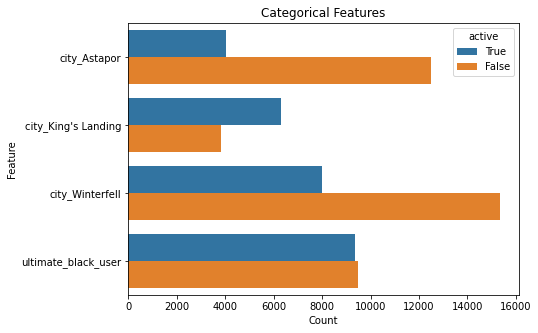

In [54]:
# Set the hue for the 'active' column
hue_order = [True, False]

#Plot the `dfg_melt`
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=dfg_cat_melt, y='Feature', x='Count', hue = 'active', hue_order=hue_order)
plt.title('Categorical Features')
plt.show()

### Numerical Features

#### Stats

In [55]:
#seperate active and disactive
df_active_num = df_1hat[num_columns].loc[df_1hat['active'] == 1]
df_disactive_num = df_1hat[num_columns].loc[~df_1hat['active'] == 1]

In [56]:
#Calcualte stats 
#Active 
df_active_describe= df_active_num.describe().loc[['count', 'mean', 'std']].T
df_active_describe['cv'] = df_active_describe['std']/df_active_describe['mean']
df_active_describe['active'] = 1

#Disactive
df_disactive_describe= df_disactive_num.describe().loc[['count', 'mean', 'std']].T
df_disactive_describe['cv'] = df_disactive_describe['std']/df_disactive_describe['mean']
df_disactive_describe['active'] = 0

In [57]:
#Concat stat tables
df_num_describe = pd.concat([df_active_describe,df_disactive_describe],axis = 0)

display(df_num_describe)

,count,mean,std,cv,active
trips_in_first_30_days,18310.0,3.349590,5.020615,1.498874,1
avg_rating_of_driver,18310.0,4.619623,0.521711,0.112934,1
avg_rating_by_driver,18310.0,4.763375,0.324318,0.068086,1
avg_surge,18310.0,1.073720,0.163183,0.151979,1
surge_pct,18310.0,9.128165,15.489344,1.696874,1
weekday_pct,18310.0,62.214604,29.068319,0.467227,1
avg_dist,18310.0,5.118977,4.627946,0.904076,1
since_signup_date,18310.0,165.692245,8.878553,0.053585,1
trips_in_first_30_days,31690.0,1.659167,2.661903,1.604361,0
avg_rating_of_driver,31690.0,4.667611,0.603863,0.129373,0


#### Plots

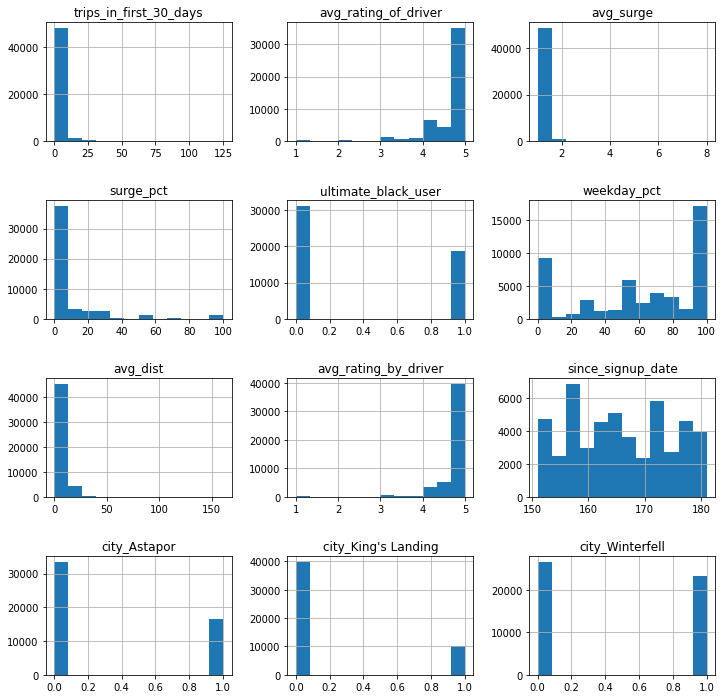

In [58]:
#Plot histogram of all features
df_1hat.hist(figsize=(12,12), bins = 12)
plt.subplots_adjust(hspace=0.5)

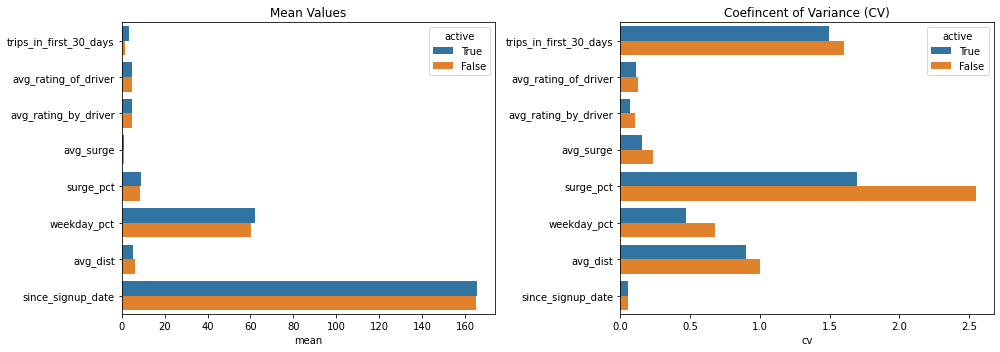

In [59]:
# Set the hue for the 'active' column
hue_order = [True, False]

#Plot the stats
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

#plot mean values
sns.barplot(data = df_num_describe,
            y = df_num_describe.index,
            x = 'mean',
            hue = 'active',
            hue_order = hue_order,
            ax=axes[0])
axes[0].set_title('Mean Values')

#plot cv values
sns.barplot(data = df_num_describe,
            y = df_num_describe.index,
            x = 'cv',
            hue = 'active',
            hue_order = hue_order,
            ax=axes[1])
axes[1].set_title('Coefincent of Variance (CV)')

plt.tight_layout()
plt.show()

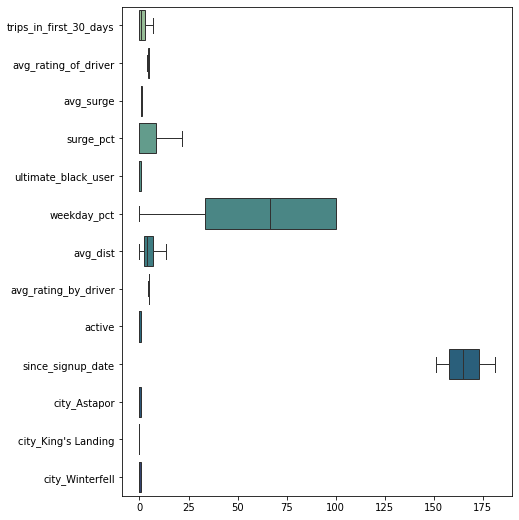

In [60]:
fig, ax = plt.subplots(figsize=(7,9))

sns.boxplot(data = df_1hat,
            orient = 'h',
            width=0.8,
            palette='crest',
            linewidth= 1,
            sym = '')
plt.show()

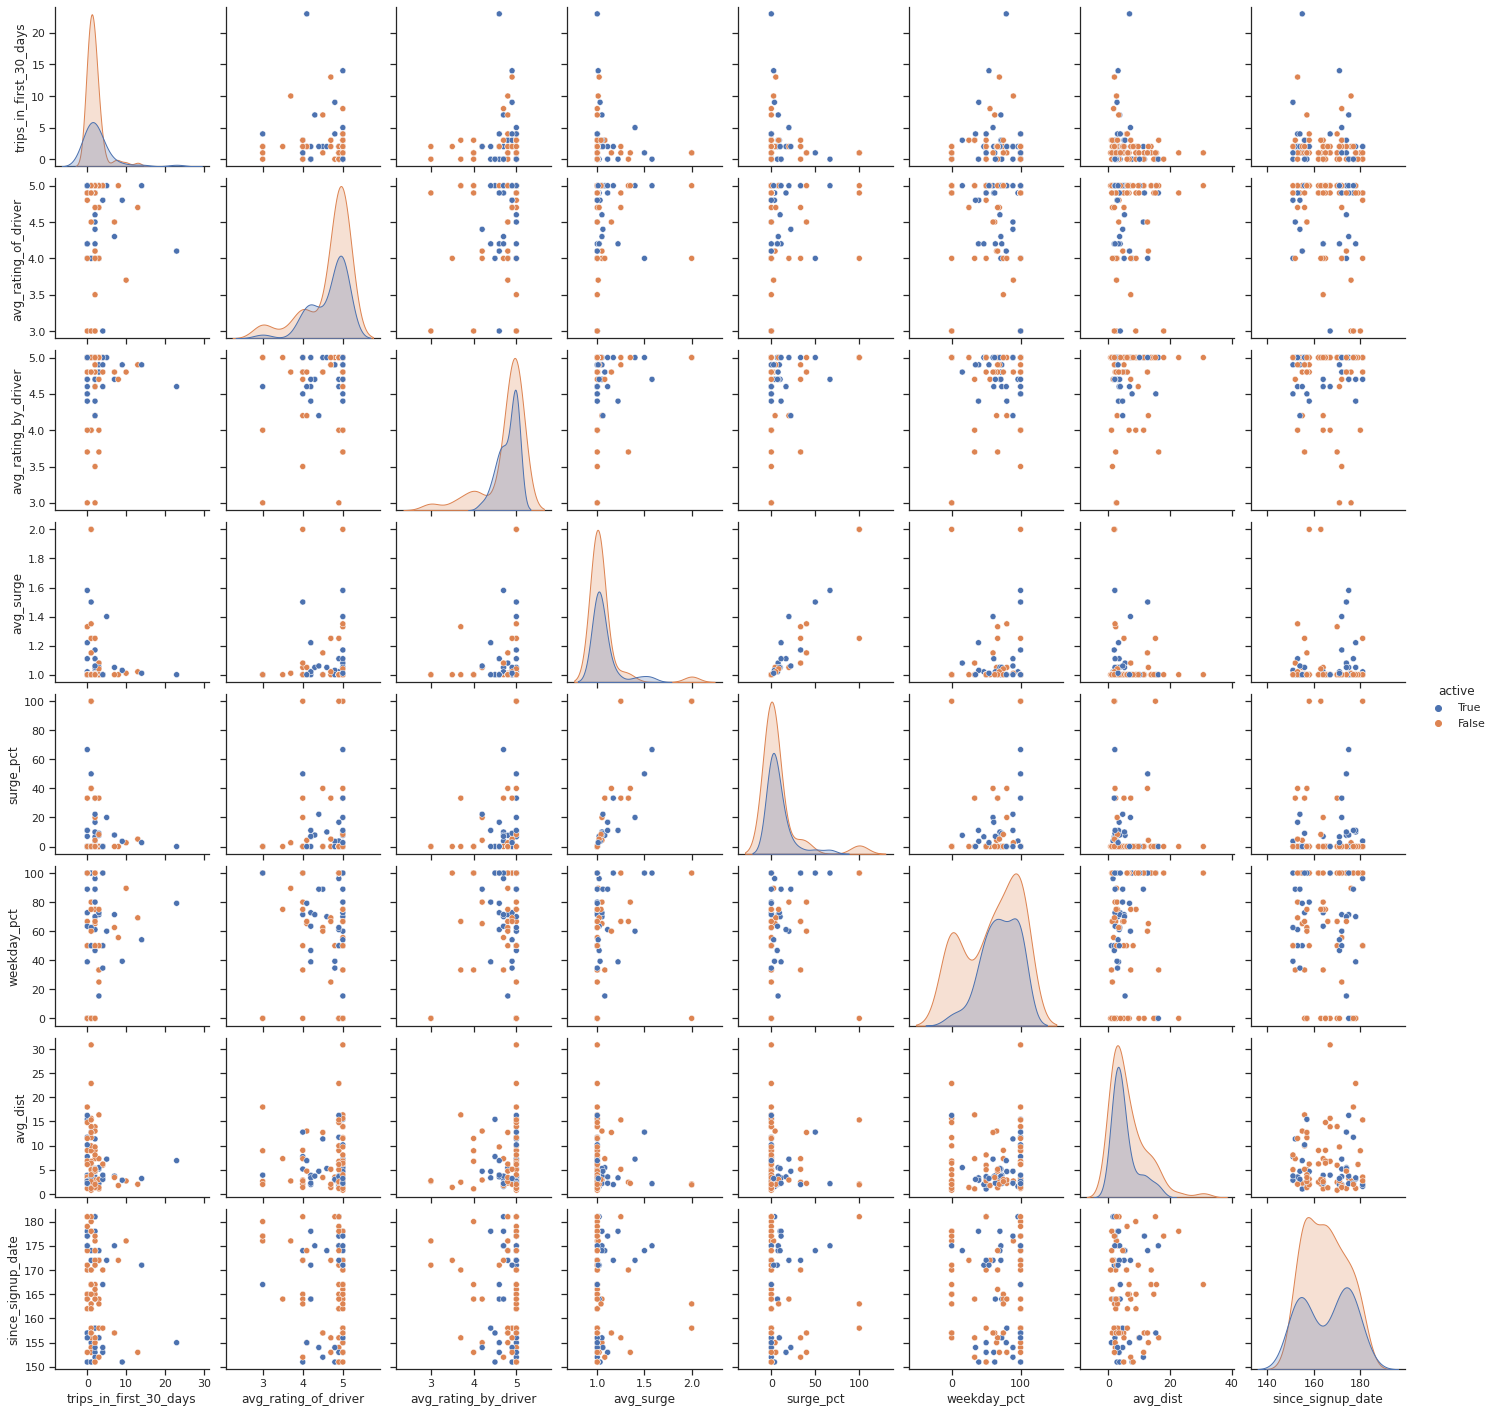

In [61]:
df_plot = df_1hat.sample(100)

# Set the style of the plots
sns.set(style="ticks", color_codes=True)

# Set the hue for the 'active' column
hue_order = [True, False]

# Plot histograms of numerical columns
g = sns.pairplot(df_plot, diag_kind="kde", hue='active', vars = num_columns, hue_order=hue_order)
plt.show()

### Multivariate Analysis

In [72]:
def plot_corr_matrix (df, round_vals, mask = True):
    '''This function plots Correlation matrix'''
    
    # Compute the correlation matrix
    corr = df.corr()
        
    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr.round(round_vals), mask=mask, cmap='coolwarm', vmin = -1, vmax=1, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Pearson Correlation Matrix')

    plt.show()

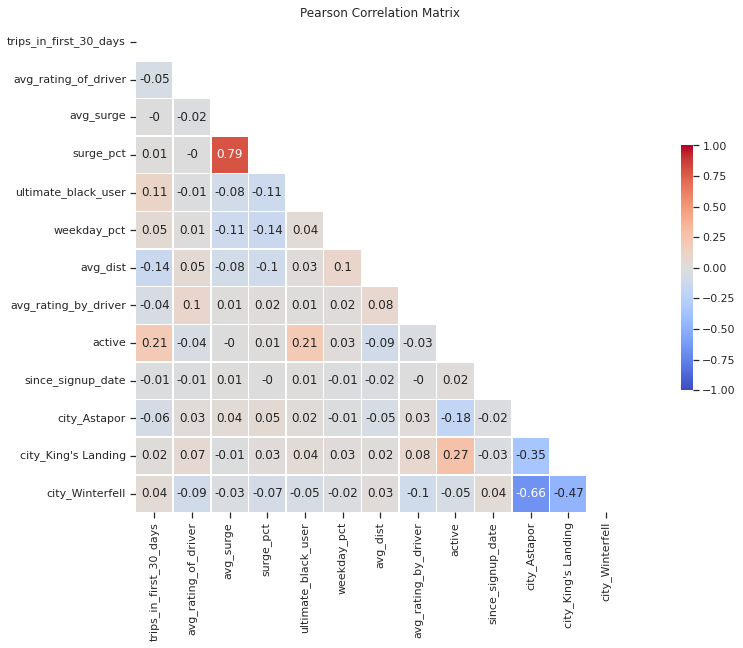

In [73]:
#Plot Corr matrix
plot_corr_matrix(df=df_1hat, round_vals=2, mask = True)

In [74]:
def plot_pps_matrix(df, round_vals=2, mask = True):
    '''This function gets a df and plot PPS score matrix'''
    
    # Compute the PPS matrix
    matrix = pps.matrix(df)

    #Plot PPS
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(matrix_pps, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(matrix_pps.round(round_vals), mask = mask, cmap="Blues", vmin = 0, vmax=1, center=0.5,
                square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5}).set(title='PPS Matrix')
    plt.show()


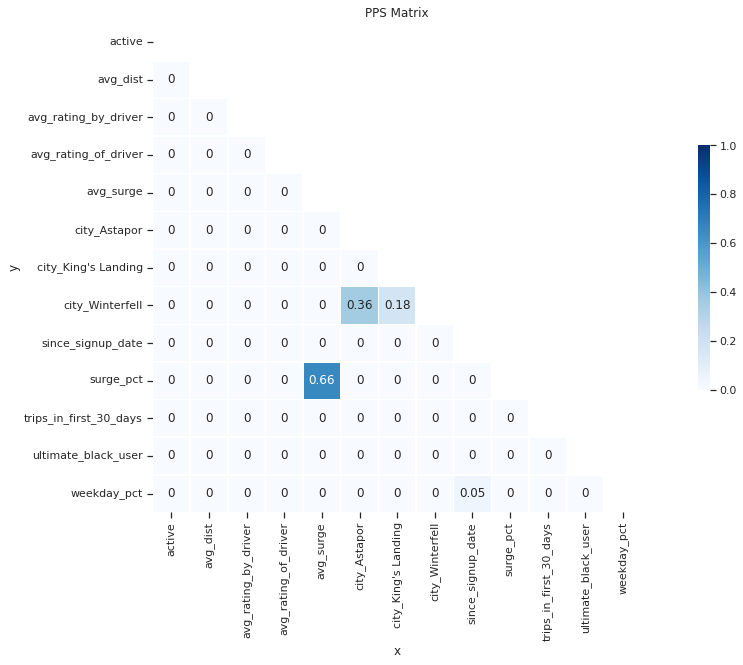

In [75]:
    #Plot PPS
plot_pps_matrix(df=df_1hat, round_vals=2, mask=True)

## 5. Model Building

In [66]:
from pycaret.classification import *

# check version
from pycaret.utils import version
version()

ModuleNotFoundError: ignored

### Initialize Setup

In [ ]:
data = df_1hat
data.head().T

In [ ]:
data.dtypes

In [ ]:
clf1 = setup(data=data,
             target = 'active',
             session_id=123,
             log_experiment=True,
             transformation=True,
             train_size=0.7,
             categorical_features= cat_columns,
             log_plots=True)

## 6. Model Deployment

## 7. Communication of Results